# Code Beispiele

Auf dieser Seite sind einige Beispiele aufgeführt. Das ist nicht zwingend der beste Code den ihr im internet findet. Er ist aber eine gute möglichkeit um ein bischen Coden zu üben und sich "Inspirieren zu lassen".

Für mehr Code "Inspirationen" könnt ihr bei einigen von diesen Links vorbei schauen:

- [Matplotlib Beispiele](https://matplotlib.org/stable/gallery/index.html) 
- [Sympy Beispiele](https://www.tutorialspoint.com/sympy/sympy_quick_guide.htm)
- [Numpy Beispiele](https://numpy.org/numpy-tutorials/)
- 


Wenn ihr ganz besonders viel lust habt könnt ihr versuchen meinen Code zu verbessern.
Zum Beispiel optimiesieren auf:
- möglichst wenig Zeilen
- möglichst kurze laufzeit
- ergänzen der Fehlerbalken


```{contents}
```


<a id="Messdate_auswerten">

## Beispiel 1:
</a>
Auswerten von einigen Messdaten. Dafür werden erst mal die Messdaten aufgenommen. Danach wird die Differenz der Korellierenden Messdaten genommen und anschliessend werden die Daten geplottet.

Nicht der schönste Code aber er Funktioniert.

```{admonition} Anregung:
:class: toggle
Dieser Code eignet sich ganz ausgezeichnet dazu verbessert zu werden. Er sieht zwar sehr komplex aus ist aber zu großen Teilen redundant. Trotzdem muss man erst mal verstehen was der Code macht.  
Eine mögliche verbesserung könnte sein eine Funktion zu schreiben welche sachen wie den Titel, die Messdaten, eine x-Achse etc. nimmt und einem Graphen zuordnet. Dadurch könnte der Code vereinfacht und vielfältiger gemacht werden.
```

<function matplotlib.pyplot.show(close=None, block=None)>

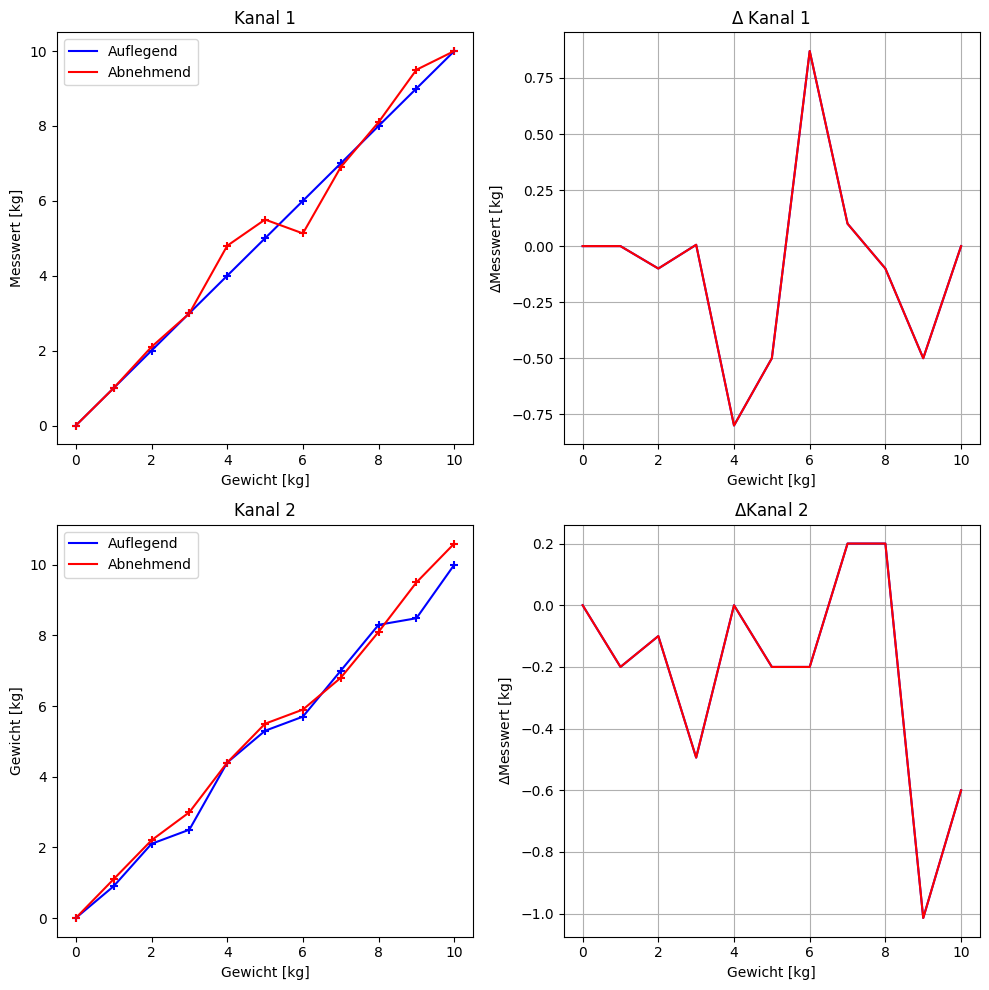

In [41]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt

# Das erste Array gibt den blauen wert an (der erste Messwert) die zweite den roten Wert
# Kanal 1 landet im oberen Plot, Kanal 2 landet im unteren wenn ihr mehr Plots braucht könnt ihr die Hinzufügen indem ihr Kanale 1 kopiert und
# und unten einfügt dann müsst ihr noch unten einen weiteren subplot hinzufügen (habe ich für euch exemplarisch auskommentiert)

Kanal1=[np.array([0,1,2,3,4,5,6,7,8,9,10]), np.array([0,1,2.1,2.994,4.8,5.5,5.13,6.9,8.1,9.5,10])]
Kanal2=[np.array([0,0.9,2.1,2.5,4.4,5.3,5.7,7,8.3,8.486,10]), np.array([0,1.1,2.2,2.994,4.4,5.5,5.9,6.8,8.1,9.5,10.6])]

# Bilden der Differenz
dKanal1 = []
dKanal2 = []

for i in range(len(Kanal1[1])):
    diff = Kanal1[0][i] - Kanal1[1][i] 
    dKanal1.append(diff)
    diff = Kanal2[0][i] - Kanal2[1][i]
    dKanal2.append(diff)
#print(len(Kanal1[1]))



# Einstellen der Farben und Legenden
color = ['blue', 'red']
Ereigniss = ['Auflegend', 'Abnehmend']

x_Achse= np.linspace(0,10,11)
#print(len(x_Achse))



fig, axs = plt.subplots(2,2, figsize=(10,10))

for i in range(2):
    # Plotten des Kanal 1
    axs[0,0].set_title('Kanal 1')
    axs[0,0].plot(x_Achse,(Kanal1[i]), color=color[i], label=Ereigniss[i])
    axs[0,0].legend()
    axs[0,0].scatter(x_Achse,Kanal1[i], color=color[i], marker='+')
    axs[0,0].set_xlabel('Gewicht [kg]')
    axs[0,0].set_ylabel('Messwert [kg]')


    # Plotten Kanal 1 differenz
    axs[0,1].set_title(r'$\Delta$ Kanal 1 ')
    axs[0,1].plot(x_Achse,(dKanal1), color=color[i], label=Ereigniss[i])
    #axs[0,0].scatter(x_Achse,dKanal1, color=color[i], marker='+')
    axs[0,1].set_xlabel('Gewicht [kg]')
    axs[0,1].set_ylabel(r'$\Delta$Messwert [kg]')
    axs[0,1].grid(True)

    # Plotten des Kanal 2
    axs[1,0].set_title('Kanal 2')
    axs[1,0].plot(x_Achse,Kanal2[i], color=color[i], label=Ereigniss[i])
    axs[1,0].legend() 
    axs[1,0].scatter(x_Achse,Kanal2[i], color=color[i], marker='+')
    axs[1,0].set_xlabel('Gewicht [kg]')
    axs[1,0].set_ylabel('Gewicht [kg]')


    # Plotten Kanal 2 differenz
    axs[1,1].set_title(r'$\Delta$Kanal 2 ')
    axs[1,1].plot(x_Achse,(dKanal2), color=color[i], label=Ereigniss[i])
    #axs[1,1].scatter(x_Achse,dKanal2, marker='+')
    axs[1,1].set_xlabel('Gewicht [kg]')
    axs[1,1].set_ylabel(r'$\Delta$Messwert [kg]')
    axs[1,1].grid(True)


fig.tight_layout()

#plt.savefig('Plot1.png')

plt.show

```{admonition} Bemerkung:
:class: toggle
Dieses Code Beispiel kann nach einigen Anpassungen auch für die Darstellung eurer eigenen Daten genutzt werden ;)
```

<a id="Bestimmen_der_Messunsicherheit"><br><br>

## Beispiel 2
</a>

Neben dem Delta der Messwerte kann man auch viele andere (nützlichere) dinge für die Messwerte bestimmen zum Beispiel die Fehler. Dafür gibt es verschiedene Formeln aber es könnte in etwa so aussehen:

In [ ]:
%reset -f

import numpy as np
from sympy import *


# Messwerte
 
Mess = [[118,119,116.4,116.9],
        [564,565.2,553.7,551.7]]


# Unsicherheit
Unsicherheit = 0.002

# Nennmoment
nMb = 50000000 # [Nm]

# E-Modul
Emod= 2.1e5

# Vertrauensfaktor t(P=95%, 10)

t = 3.18



# Berechnen einiger Ableitungen
# Für Darstellung der Antwort
M_b, E, e = symbols('M_b E e')
W_ax = M_b /(E * e)
dWax_Mb = diff(W_ax, M_b)
dWax_E = diff(W_ax, E)
dWax_e = diff (W_ax, e)


# Definieren der Formeln: 


def Mittelwert (Messwerte):
    Ausgabe = float()
    n = len(Messwerte)
    
    for i in Messwerte:
        Ausgabe = Ausgabe + i
    
    return 1/n * Ausgabe

def Standartabweichung(Messwerte):
    Ausgabe = float()
    
    mittel = Mittelwert(Messwerte)
    n = len(Messwerte)

    for i in Messwerte:
        Ausgabe = Ausgabe+(i - mittel)**2

    return np.sqrt(1/(n-1)*Ausgabe)

def Messunsicherheit (t, Messwerte):
    n = len(Messwerte)
    s = Standartabweichung(Messwerte)
    return t/(np.sqrt(n))*s

def Wiederstandsmoment (Messwerte, NennMoment, E_Modul):
    epsilon = Mittelwert(Messwerte)
    Ausgabe = NennMoment / (E_Modul * epsilon)
    return Ausgabe

def SonderUnsicherheit(Messwert, Unsicherheit):
    return Messwert * Unsicherheit
    

def Vertrauensgrenzen(Biegemoment, E_Modul, Epsilon):
    dWax_Mb = 1/(E_Modul*Epsilon)
    dWax_E = -Biegemoment/(E_Modul**2 * Epsilon)
    dWax_e = -Biegemoment/(E_Modul * Epsilon**2)

    return np.sqrt( (dWax_Mb * Biegemoment)**2 + (dWax_E * E_Modul)**2 + (dWax_e * Epsilon)**2 )



for i in Mess:
    mMess = Mittelwert(i)
    sMess = Standartabweichung (i)
    UnMess = Messunsicherheit (t, i)
    WMom = Wiederstandsmoment(i, nMb, Emod)
    UnMb = SonderUnsicherheit(nMb, Unsicherheit)
    UnE = SonderUnsicherheit(nMb, Unsicherheit)    
    
    print('Messreihe:', i)
    print(r'Der Mittelwert der Messwerte beträgt:', mMess)
    print(r'Die Standartabweichung der Messwerte beträgt:',sMess)
    print(r'Die Messunsicherheit für epsilon beträgt:', UnMess)
    print(r'Die Messunsicherheit fürs Drehmoment beträgt:', UnMb)
    print(r'Die Messunsicherheit fürs E-Modul beträgt:', UnE)
    print(r'Das Wiederstandsmoment beträgt:', WMom)
    print(r'Die Unsicherheit des Wiederstandsmoment beträgt:',Vertrauensgrenzen(nMb, Emod, mMess))
    print('')


print('Für diese Formel gelten die Partiellen ableitungen')
display(W_ax)
print(r'Die Partielle Ableitung nach M_b lautet:')
display(dWax_Mb)
print(r'Die Partielle Ableitung nach E lautet:')
display(dWax_E)
print(r'Die Partielle Ableitung nach epsilon lautet:')
display(dWax_e)


<a id="Sinus-Kurve_ohne_Sinus"><br><br>

## Beispiel 3:
</a>

Hier Berechnen wir nicht den Sinus sondern nur seine Näherung mit den ersten schritten der Taylorreihe und Plotten beide Funktionen über einnander um zu Schauen wie gut beide aufeinander liegen

<function matplotlib.pyplot.show(close=None, block=None)>

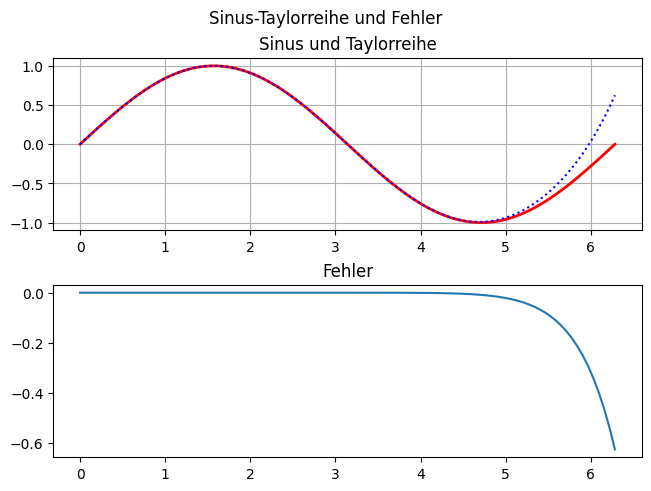

In [40]:
%reset -f

import math as m
import matplotlib.pyplot as plt
import numpy as np


x = np.linspace(0, 2*np.pi, 100)


def sinusBerechnen(x1):
    Sinus = float()
    for i in range(0, 7):
        Sinus = Sinus + (-1)**i * (x1**(2*i+1))/m.factorial(2*i +1)
    return(Sinus)

Deltay = (np.sin(x)-sinusBerechnen(x))


# Plotten der Funktionen

fig, axes= plt.subplots(2,1, layout="constrained")

fig.suptitle("Sinus-Taylorreihe und Fehler")

axes[0].plot(x, np.sin(x), linewidth=2, color="red")
axes[0].plot(x, sinusBerechnen(x), linestyle="dotted", color="blue")
axes[0].set(title="Sinus und Taylorreihe")
axes[0].grid(True)

axes[1].plot(x, Deltay)
axes[1].set(title="Fehler")
plt.show

```{admonition} Bemerkung:
:class: tip
Die Taylorreihe ist eine mögliche Annährung an den Sinus. Sie basiert darauf das immer mehr Polynome immer höherer Ordnung addiert werden. dadurch kann jede unendlich differenzierbare Funktion abgebildet werden. Auf ähnliche weise funktioniert auch euer Taschenrechner. [Mehr zur Taylorreihe findet ihr hier](https://de.wikipedia.org/wiki/Taylorreihe)
```
<br><br>
<a id="Numerische Integration">

# Beispiel 4:
</a>

Mit diesem Code wird versucht eine Funktion zu integrieren. Und zwar ohne Sympy, also nicht Symbolisch sondern Numerisch. 
Da dies relativ einfach ist und es mehr um Mathe geht hier erst der Output und Überlegt mal selber wie ihr es machen würdet.

```{admonition} Tipp 1:
:class: tip, dropdown
Was ist eine Integration wenn nicht eine SEHR lange Plusrechnung?
```
```{admonition} Tipp 2:
:class: tip, dropdown
Integrieren heist die Fläche unter einem Graphen bestimmen, oder? Warum Addieren wir also nicht einfach alle Funktionswerte?  
OK... Vielleicht sind ALLE Funktionswerte (Alle $\approx\infty$) ein bischen viel...
Eine Annäherung müsste ja auch gehen...
```
```{admonition} Tipp 3:
:class: tip, dropdown
Schon mal was von einer [Trapezformel](https://letmegooglethat.com/?q=Trapez+formel+Numerisches+Integral) gehört?
```
```{admonition} Tipp 4:
:class: tip, dropdown
Die Formel die wir suchen könnte zum Beispiel lauten:
$
\begin{align*}
\int_{ux}^{ox} f(x) dx \approx \frac{f(ox)-f(ux)}{2n} \cdot \left( f(ux) + f(ox)+ \sum_{i=1}^{n-1} 2 \cdot f(x_i) \right)
\end{align*}
$
```
```{admonition} Tipp 5:
:class: tip, dropdown
Eine Liste beginnt mit dem Eintrag 0 nicht mit dem Eintrag 1. Folglich muss bei eurer Summenformel nicht umbedingt die ganze Liste Abgearbeitet werden da der erste und letzt eintrag anders behandelt wird als der Rest.
```
````{admonition} Tipp 6:
:class: tip, dropdown
Die Formel in Python übertragen könnte etwa so aussehen:

```python
n = len(x)
sum = f(x[0]) + f(x[n])
for i in range(1,len(x)-1):
    sum = sum + 2 *f(x[i])
Integral = (f(x[n])-f(x[0])/2) * sum
```
````

In [29]:
%reset -f
import numpy as np

#Integralgrenzen
ux = 0
ox = 10

x_Werte = np.linspace(ux,ox,500)

# Funktion:

def funktion(x):
    return np.sin(x)+1


# Berechnen des Integralwertes

def Integral(x):
    n = len(x)-1
    sum = funktion(x[0]) + funktion(x[n])
    for i in range(1,len(x)-2):
        sum = sum + 2 * funktion(x[i])
        #print(sum)
    return (x[n]-x[0])/(2*len(x))* sum

print (r'Der Integralwert der Funktion sin(x)+1 im Bereich 0-10 lautet:')
print(Integral(x_Werte))


Der Integralwert der Funktion sin(x)+1 im Bereich 0-10 lautet:
11.805873919143847


<a id="If-Else-Schleifen">

## Beispiel 5:
</a>

Manchmal benutzen wir Schleifen um Zustände zuzuweisen. Dafür haben wir ja schon im Kapitel [Python](/Python) was gelernt.
In diesem Beispiel geht es darum Auszugeben wie viele Tage ein Monat hat. Dieses Beispiel ist zweimal ausgeführt.


In [111]:
%reset -f


def motage(m):
    if m == 2:
        d = 28
    elif m>0 and m <=7 and m%2 == 1 or m>7 and m <=12 and m%2 == 0:
        d=31
    elif m>0 and m <=7 and m%2 == 0 or m>7 and m <=12 and m%2 == 1:
        d=30
    else:
        d=-1
    return d

tage=motage(4)
print(tage)

30


In [110]:
%reset -f
def motage(m):
    if m == 2:
        d = 28
    elif m in [1,3,5,7,8,10,12]:
        d=31
    elif m in [4,6,9,11]:
        d=30
    else:
        d=-1
    return d

tage=motage(4)

print(tage)

30


<a id="Absichern_einer_funktion"> <br><br>

## Beispiel 6

In diesem Beispiel geht es darum eine der Funktion von Oben abzusichern. Man sollte immer dan eine Funktion absichern wenn man dem Nutzer nicht trauen kann (im Zweifelsfall also immer). Ausserdem sehen wir hier wie man eine Funktion kontrollieren kann in dem wir einmal alle "richtigen" Ereignisse einfordern und (theoretisch alle) einige Versuche durchführen die Funktion kaputt zu machen.

Bevor wir uns den Code anschauen könnt ihr es aber gerne auch nochmal Probieren &#x1f608;

```{admonition} Tipp 1:
:class: tip, dropdown
Ihr könnt eine der Funktion oben einfach Kopieren dann müsst ihr euch DIE arbeit schon mal nicht machen.
```
```{admonition} Tipp 2:
:class: tip, dropdown
Unter der Kategorie Python findet ihr eine ```try-Schleife``` 
```

In [114]:
%reset -f

def motage(m):
    try:
        if m == 2:
            d = 28
        elif m>0 and m <=7 and m%2 == 1 or m>7 and m <=12 and m%2 == 0:
            d=31
        elif m>0 and m <=7 and m%2 == 0 or m>7 and m <=12 and m%2 == 1:
            d=30
        else:
            d=-1
        return d
    except Exception:
        return -2


TestListe = [-2, 'Februar', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

print('Wir testen mit dieser Liste:', TestListe)
for i in TestListe:
    tage=motage(i)
    print(tage)

Wir testen mit dieser Liste: [-2, 'Februar', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
-1
-2
31
28
31
30
31
30
31
31
30
31
30
31


<a id="Whölerschema-List-comprehension"><br><br>

## Beispiel 7
</a>

In diesem Beispiel nutzen wir das [Hörner-Schema](https://de.wikipedia.org/wiki/Horner-Schema) aus um eine geegebene Dezimalzahl (Basis-10) in eine Binärzahl (Basis-2) umzuwandeln und umgekehrt.
Da der Input einen String ausgibt müssen wir diesen erst mal in eine Liste von Strings umwandeln. Dies Funktioniert mit [List comprehension](https://www.w3schools.com/python/python_lists_comprehension.asp). 

Das Hörner-Schema  
Beispiel:<br>
$
\begin{align*}
199 / 2 =& 99 \text{ mod } 1 \\  
99 / 2 =& 49 \text{ mod } 1 \\  
49 / 2 =& 24 \text{ mod } 1 \\  
24 / 2 =& 12 \text{ mod } 0 \\  
12 / 2 =& 6 \text{ mod } 0 \\  
6 / 2 =& 3 \text{ mod } 0 \\  
3 / 2 =& 1 \text{ mod } 1 \\  
1 / 2 =& 0 \text{ mod } 1  
\end{align*}$

In [129]:
%reset -f
import numpy as np
import math as m


EingabeBin = '10111'
EingabeDex = 23

def myBintoDex(Bin):
    listofBin=[int(x) for x in Bin]
    ListofBin=listofBin[::-1]
    Dez=0
    for i in range(0, len(ListofBin)):
        Dez = Dez + ListofBin[i]*2**i
    return Dez

def myDextoBin(Dez):
    Bin = ''
    for i in range(m.ceil(m.log2(Dez))):
        if Dez >1:
            r=Dez%2
            Dez=Dez//2
            Bin=str(r)+Bin # hängt den Rest an den bestehenden Text an
        elif Dez==1:
            Bin=str(Dez)+Bin
            Dez = 0
        else:
            Bin='0'+Bin
    return(Bin)


print(str(EingabeBin) + ' => ' + str(myBintoDex(EingabeBin)))
print(str(EingabeDex) + ' => ' + myDextoBin(EingabeDex))


10111 => 23
23 => 10111


```{admonition} Anregung:
:class: tip, dropdown
In der Funktion ```myDextoBin``` wird eine Schleife über einen scheinbar, seltsamen Bereich ausgeführt.  (
$
\lceil{\log_2(Dez)+1}\rceil
$
)  
Diese scheinbar seltsame Formel ist ANGEWANDTE MATHE! Diese Formel beschreibt wie oft die Schleife ausgeführt werden muss um die gesamte Zahl umzuwandeln.
Wenn ihr wollt könnt ihr versuchen das zu beweisen (ist nicht so schwer)
```